<a href="https://colab.research.google.com/github/edogriba/NAML-2024/blob/main/CreditCardFraudDetectionSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Fraud Detection System
*Project for Numerical Analysis for Machine Learning*

## Framing the problem

- Dataset highly unbalanced
- Concept drift
-

Features

- attribute name (description)
- transaction id
- cardholder id
- amount
- time
- label

For privacy reasons features are transformed with PCA.
Only ones not transformed are: time, amount and class.



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#!kaggle datasets download -d mlg-ulb/creditcardfraud
#!unzip creditcardfraud.zip

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
creditcardfraud.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  creditcardfraud.zip
replace creditcard.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: creditcard.csv          


In [3]:
df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


We see that we have 30 features as columns of which 28 are labeled as Vn where n is number. This is due to the fact that banks or credit card provider in general cannot disclose any kind of sensistive nor personal information to third parties. Therefore what we get are simply the principal components of our original dataset. In this case since it is difficult to interpret those principal components, we start exploring the other columns relative to the features and the labels.

First let's try to plot the distribution of the amounts spent to see if the dataset has some problems (e. g. the value of the transactions could be cut off as we saw in the lab where we used the dataset of the California houses)

<Axes: xlabel='Amount', ylabel='Count'>

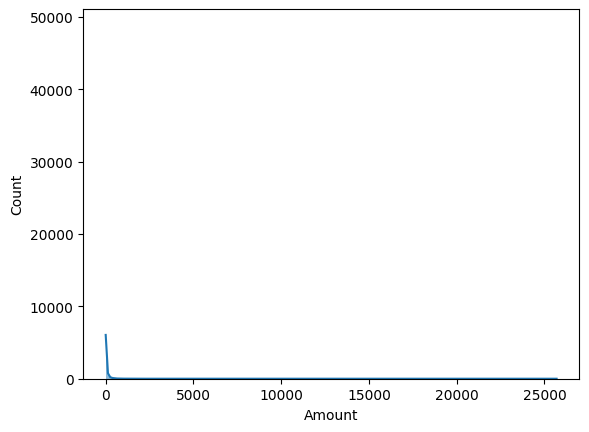

In [5]:
sns.histplot(data=df, kde=True, x="Amount")

We see that the histogram is not nicely rendered and difficult to interpret since the transactions have a big difference in value, therefore let's plot them using a logarithmic scale

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='log_Amount', ylabel='Count'>

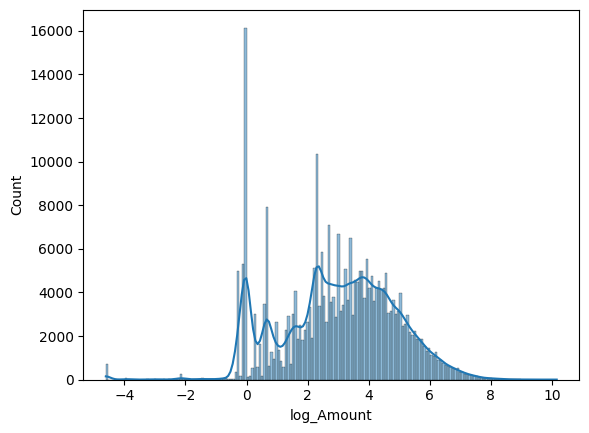

In [6]:
df["log_Amount"] = np.log(df["Amount"])

sns.histplot(data=df, kde=True, x="log_Amount")


We plotted the transactions with the natural logarithm scale and see that most of the them are included between ~$e^{-1}$ and ~$e^{-1}$ which makes sense as it means that most of the transactions are between ~0.36 € and ~2970 €. In particular apart of the spikes which are somehow normal in such datasets related to credit card transactions, the labels about the amount are okay.

We can also get the same heatmap of the paper and see that there are not particular correlations between the features

<Axes: >

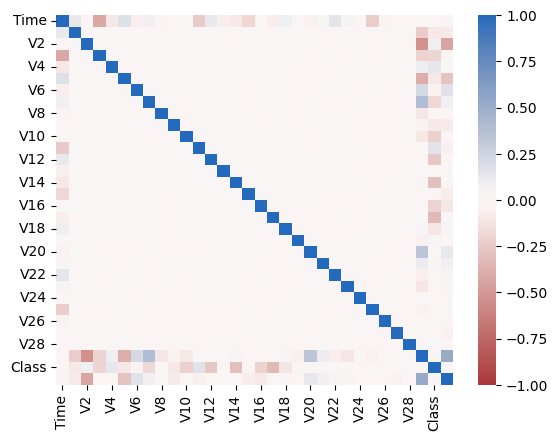

In [7]:
sns.heatmap(df.corr(), cmap="vlag_r", vmin=-1, vmax=1)

Now let's analyze the labels: the class is our target. It will have a value of  1 if the transaction is labelled as fraudulent (positive class) and 0 otherwise (negative class). Let's count the occurrences of the two.

In [8]:
value_counts = df['Class'].value_counts()

print(f"{(value_counts[1]/(value_counts[0]+value_counts[1])*100):.3f}%")

0.173%


We notice a big problem of our dataset. It is hugely unbalanced: on 28807 transactions there are only 492 that are fraudulent: this amounts to only 0.17% of our dataset. This is a big problem indeed a naive classifier which would always output 1 no matter what would have an accuracy of 99.83% on this dataset, however it would be useless for the purpose since the whole point of a credit card fraud detection system is to find out only those transactions who are fraudulent.
To tackle this matter, the paper uses not only the accuracy but also precision and the Matthew's Correlation Coefficient (MCC)

$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$

$
\text{Precision} = \frac{TP}{TP + FP}
$

$\text{MCC} = \frac{TP \times TN - FP \times FN}{\sqrt{(TP+FP)(TP+FN)(TN+FP)(TN+FN)}}$

## Data Processing (Normalization, Shuffling and Splitting into Train and Test set)

In [9]:
y_true = df["Class"]
df.drop(columns=["log_Amount", "Class"], inplace=True)
mean = df.mean()
std = df.std()
df_normalized = (df - mean) / (std)


df_normalized.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05
mean,-1.149614e-16,-2.195443e-17,-1.516852e-17,-3.832046e-17,1.197515e-17,3.592544e-17,5.987573e-18,5.189230e-18,-8.981359e-19,5.488608e-18,...,-3.991715e-18,-3.193372e-18,6.386744e-18,-4.390887e-18,8.981359e-18,-3.512709e-17,1.319137e-17,2.220391e-18,-7.434569e-18,2.235360e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.996580e+00,-2.879850e+01,-4.403521e+01,-3.187168e+01,-4.013912e+00,-8.240795e+01,-1.963602e+01,-3.520933e+01,-6.130242e+01,-1.222799e+01,...,-7.069134e+01,-4.741898e+01,-1.506562e+01,-7.175434e+01,-4.683630e+00,-1.975030e+01,-5.401088e+00,-5.590650e+01,-4.674604e+01,-3.532288e-01
25%,-8.552105e-01,-4.698909e-01,-3.624701e-01,-5.872131e-01,-5.993777e-01,-5.010677e-01,-5.766811e-01,-4.478852e-01,-1.746801e-01,-5.853621e-01,...,-2.746329e-01,-3.109428e-01,-7.473463e-01,-2.591780e-01,-5.854666e-01,-6.083990e-01,-6.780705e-01,-1.755050e-01,-1.604437e-01,-3.308395e-01
50%,-2.131450e-01,9.245335e-03,3.965677e-02,1.186122e-01,-1.401721e-02,-3.936675e-02,-2.058043e-01,3.241718e-02,1.871979e-02,-4.681161e-02,...,-8.104691e-02,-4.009422e-02,9.345360e-03,-1.792417e-02,6.765666e-02,3.183234e-02,-1.081215e-01,3.325168e-03,3.406362e-02,-2.652710e-01
75%,9.372158e-01,6.716927e-01,4.867194e-01,6.774557e-01,5.250073e-01,4.433457e-01,2.991620e-01,4.611099e-01,2.740780e-01,5.435296e-01,...,1.725730e-01,2.537387e-01,7.283347e-01,2.364315e-01,7.257141e-01,6.727994e-01,4.996654e-01,2.255644e-01,2.371521e-01,-4.471699e-02
max,1.642055e+00,1.253349e+00,1.335773e+01,6.187982e+00,1.191872e+01,2.521409e+01,5.502005e+01,9.747807e+01,1.675150e+01,1.419492e+01,...,5.113455e+01,3.703465e+01,1.447302e+01,3.607661e+01,7.569671e+00,1.442529e+01,7.293962e+00,7.831926e+01,1.025432e+02,1.023621e+02


In [10]:
np.random.seed(0) # for reproducibility


df_normalized_np = df_normalized.to_numpy()
df_normalized_np = np.concatenate((df_normalized_np, y_true.to_numpy().reshape(-1, 1)), axis=1)
print(df_normalized_np)
np.random.shuffle(df_normalized_np)


fraction_test = 0.2

num_train = int(df_normalized_np.shape[0] * (1-fraction_test))
print("The training set is composed of", num_train)
print("The test set is composed of", df_normalized_np.shape[0] - num_train)

x_train = df_normalized_np[:num_train, :-1]

y_train = df_normalized_np[:num_train, -1:]

x_test = df_normalized_np[num_train:, :-1]

y_test = df_normalized_np[num_train:, -1:]

print("Train x", x_train)
print("Train y", y_train)
print("Test x", x_test)
print("Test y", y_test)
print("Train x", x_train.shape)
print("Train y", y_train.shape)
print("Test x", x_test.shape)
print("Test y", y_test.shape)

[[-1.99657952 -0.6942411  -0.04407485 ... -0.06378104  0.24496383
   0.        ]
 [-1.99657952  0.60849526  0.16117564 ...  0.04460744 -0.34247394
   0.        ]
 [-1.99655846 -0.69349925 -0.8115764  ... -0.18102051  1.16068389
   0.        ]
 ...
 [ 1.64197062  0.98002202 -0.1824334  ... -0.08046706 -0.08183916
   0.        ]
 [ 1.64197062 -0.12275518  0.32124978 ...  0.31668622 -0.31324798
   0.        ]
 [ 1.64205485 -0.27233046 -0.11489878 ...  0.04134991  0.51435441
   0.        ]]
The training set is composed of 227845
The test set is composed of 56962
Train x [[ 0.65294485 -0.16507595  0.6403741  ...  0.26879508  0.48817733
  -0.19330561]
 [ 1.31445731 -0.17854656  0.56477546 ...  0.19034649  0.53187174
  -0.34531258]
 [ 1.21413753 -0.8243806  -1.4573713  ...  0.70927169  1.32488349
   0.03058683]
 ...
 [-0.40409789  0.73343621 -0.66149958 ...  0.13872378  0.11893123
  -0.18938749]
 [ 0.6586726  -0.30224429 -0.34424933 ...  0.18620206  0.49286665
   0.08636003]
 [-0.50412285 -0.

## Function to compute metrics

In [11]:
def compute_metrics(y, y_pred):
  TP = np.sum(np.logical_and(y_pred == 1., y == 1.))
  TN = np.sum(np.logical_and(y_pred == 0., y == 0.))
  FP = np.sum(np.logical_and(y_pred == 1., y == 0.))
  FN = np.sum(np.logical_and(y_pred == 0., y == 1.))

  accuracy = ((TN + TP) / len(y)) * 100 # Accuracy
  recall = (TP / (FN + TP)) * 100 # Recall or sensitivity
  precision = (TP / (FP + TP)) * 100 # Precision
  matthews_correlation = (TP * TN - FP * FN) / np.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN)) # MCC

  print(f"Accuracy: {accuracy:.2f}%")
  print(f"Recall: {recall:.2f}%")
  print(f"Precision: {precision:.2f}%")
  print(f"MCC: {matthews_correlation:.2f}")


## Naive Classifier

In [12]:
naive_y_pred_train = np.zeros(y_train.shape)
compute_metrics(y_train, naive_y_pred_train)
naive_y_pred_test = np.zeros(y_test.shape)
compute_metrics(y_test, naive_y_pred_test)

Accuracy: 99.83%
Recall: 0.00%
Precision: nan%
MCC: nan
Accuracy: 99.82%
Recall: 0.00%
Precision: nan%
MCC: nan


<ipython-input-11-b156ba6c3581>:9: RuntimeWarning: invalid value encountered in scalar divide
  precision = (TP / (FP + TP)) * 100 # Precision
<ipython-input-11-b156ba6c3581>:10: RuntimeWarning: invalid value encountered in scalar divide
  matthews_correlation = (TP * TN - FP * FN) / np.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN)) # MCC


## Logistic Regression


In [13]:
import jax
import jax.numpy as jnp
from jax import grad
from jax import random
import jax.scipy.optimize

In [14]:
w = jnp.array(np.random.randn(30, 1))
b = jnp.array([0.0])

print(w.shape)
print(b.shape)

params = list()
params.append(w)
params.append(b)


(30, 1)
(1,)


In [15]:
def tanh(z):
    return (jnp.tanh(2*z)+1)/2

def loss_X_ent(x, y, params):
    y_pred = tanh(x @ params[0] + params[1])
    eps = 1e-6
    return -jnp.mean(y * jnp.log(y_pred + eps) + (1-y) * jnp.log(1 - y_pred + eps))

def mse_loss(x, y, params):
    y_pred = x @ params[0] + params[1]
    return jnp.mean((y - y_pred)**2)

loss_X_ent(x_test, y_test, params)
grad = jax.jit(jax.grad(loss_X_ent, argnums=2))
print(x_test.shape)
print(y_test.shape)
print(params[0].shape)
print(params[1].shape)
print("cross", loss_X_ent(x_train, y_train, params))
print("grad", grad)
print("min x_test:", jnp.min(x_test))
print("max x_test:", jnp.max(x_test))
print("min y_test:", jnp.min(y_test))
print("max y_test:", jnp.max(y_test))


(56962, 30)
(56962, 1)
(30, 1)
(1,)
cross 4.635953
grad <PjitFunction of <function loss_X_ent at 0x79f460139da0>>
min x_test: -71.75434
max x_test: 51.26569
min y_test: 0.0
max y_test: 1.0


  0%|          | 0/1000 [00:00<?, ?it/s]

cross 4.645472
cross 0.03274464
cross 0.008557287
cross 0.007500351
cross 0.007432766
cross 0.0073767086
cross 0.0073242392
cross 0.0072740777
cross 0.007228019
cross 0.007183013
cross 0.0071399547
cross 0.0070986794
cross 0.0070607755
cross 0.0070249108
cross 0.0069903852
cross 0.0069552683
cross 0.0069227824
cross 0.0068915556
cross 0.0068616658
cross 0.0068323184
elapsed time: 121.790455 s
loss train     : 6.804e-03
loss test: 6.893e-03


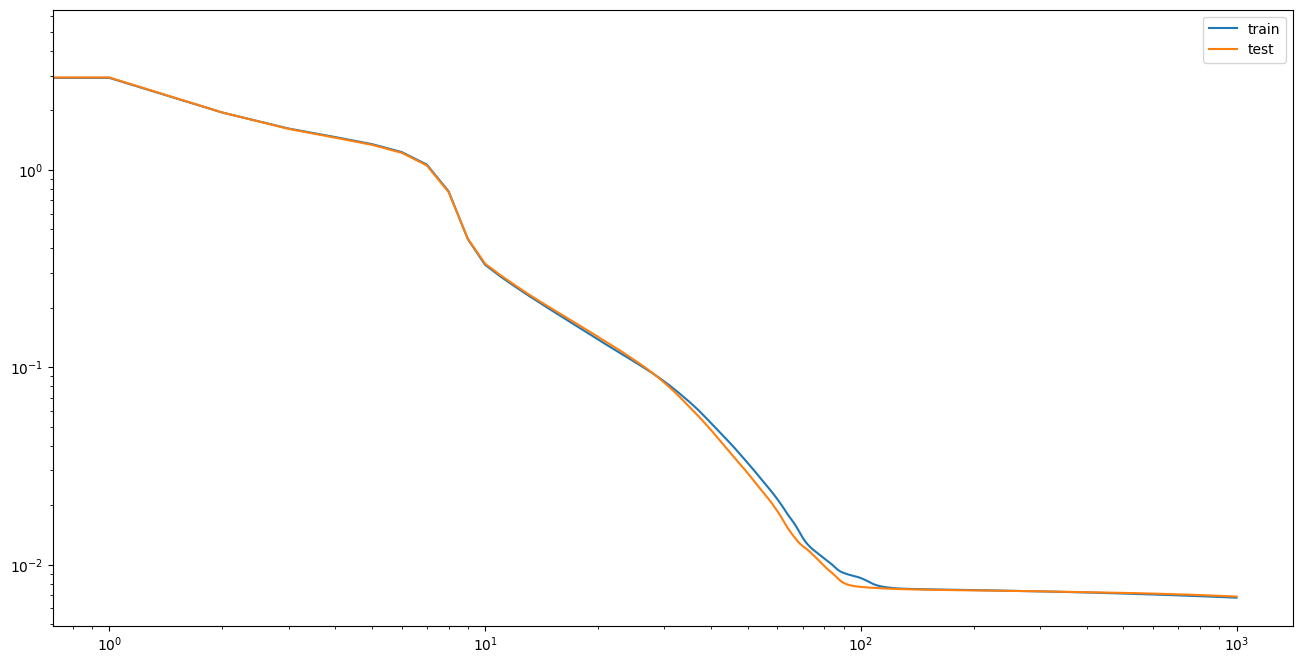

In [16]:
# Gradient Descent

from tqdm.notebook import tqdm
import time
# Hyperparameters
num_epochs = 1000
learning_rate = 1
########################################

params = []
params.append(w)
params.append(b)

grad = jax.jit(jax.grad(loss_X_ent, argnums=2))
loss_jit = jax.jit(loss_X_ent)
grad_jit = jax.jit(grad)

n_samples = x_train.shape[0]

history_train = list()
history_test = list()
history_train.append(loss_jit(x_train, y_train, params))
history_test.append(loss_jit(x_test, y_test, params))

t0 = time.time()
for epoch in tqdm(range(num_epochs)):
    grads = grad_jit(x_train, y_train, params)
    if epoch % 50 == 0:
      print("cross", loss_jit(x_train, y_train, params))

    for i in range(len(params)):
        params[i] -= learning_rate * grads[i]

    history_train.append(loss_jit(x_train, y_train, params))
    history_test.append(loss_jit(x_test, y_test, params))

print("elapsed time: %f s" % (time.time() - t0))
print("loss train     : %1.3e" % history_train[-1])
print("loss test: %1.3e" % history_test[-1])

fig, axs = plt.subplots(1, figsize=(16, 8))
axs.loglog(history_train, label="train")
axs.loglog(history_test, label="test")

plt.legend()

In [17]:
compute_metrics(y_train, np.where(tanh(x_train @ params[0] + params[1]) >= 0.5, 1., 0.))
compute_metrics(y_test, np.where(tanh(x_test @ params[0] + params[1]) >= 0.5, 1., 0.))

Accuracy: 99.94%
Recall: 78.01%
Precision: 83.33%
MCC: 0.81
Accuracy: 99.92%
Recall: 70.30%
Precision: 83.53%
MCC: 0.77


Very similar to naive classifier

In [18]:
from imblearn.over_sampling import SMOTE

In [19]:
smote = SMOTE(sampling_strategy='auto', random_state=0)
print(x_train.shape)
print(y_train.shape)
x_train, y_train = smote.fit_resample(x_train, y_train)
print(x_train.shape)
print(y_train.shape)

(227845, 30)
(227845, 1)
(454908, 30)
(454908,)


In [20]:
import time

num_epochs = 2000
learning_rate_max = 2e-1
learning_rate_min = 5e-2
learning_rate_decay = 2000
batch_size = 1000
########################################


grad = jax.jit(jax.grad(loss_X_ent, argnums=2))
loss_jit = jax.jit(loss_X_ent)
grad_jit = jax.jit(grad)

n_samples = x_train.shape[0]

history_train = list()
history_test = list()
history_train.append(loss_jit(x_train, y_train, params))
history_test.append(loss_jit(x_test, y_test, params))

t0 = time.time()
for epoch in tqdm(range(num_epochs)):
    learning_rate = max(
        learning_rate_min, learning_rate_max * (1 - epoch / learning_rate_decay)
    )

    perm = np.random.permutation(n_samples)
    for i in range(0, n_samples, batch_size):
        batch_idx = perm[i : i + batch_size]
        x_batch = x_train[batch_idx]
        y_batch = y_train[batch_idx]
        grads = grad_jit(x_batch, y_batch, params)

        for i in range(len(params)):
            params[i] -= learning_rate * grads[i]

    history_train.append(loss_jit(x_train, y_train, params))
    history_test.append(loss_jit(x_test, y_test, params))

print("elapsed time: %f s" % (time.time() - t0))
print("loss train     : %1.3e" % history_train[-1])
print("loss test: %1.3e" % history_test[-1])

fig, axs = plt.subplots(1, figsize=(16, 8))
axs.loglog(history_train, label="train")
axs.loglog(history_test, label="test")

  0%|          | 0/2000 [00:00<?, ?it/s]

KeyboardInterrupt: 

## Neural Network

In [ ]:
def initialize_params(layers_size):
  np.random.seed(0) # for reproducibility
  params = list()
  for i in range(len(layers_size)-1):
    std = np.sqrt(2/(layers_size[i+1]+ layers_size[i]))
    w = np.random.randn(layers_size[i+1], layers_size[i]) * std
    b = np.zeros((layers_size[i+1], 1))
    params.append(w)
    params.append(b)
  return params

P = initialize_params([30, 10, 5, 1])
print(P[0].shape)
print(P[1].shape)
print(P[2].shape)
print(P[3].shape)
print(P[4].shape)
print(P[5].shape)

In [ ]:
params = initialize_params([30, 10, 5, 1])

act_fn = jnp.tanh

def ANN(x, params):

  layer = x.T
  num_layers = len(params) // 2 + 1
  weights = params[::2]
  biases = params[1::2]
  for i in range(num_layers-1):
    layer = jnp.dot(weights[i], layer) + biases[i] # jnp.dot() replaceable by @
    if i < num_layers - 2: # on the last layer the activation function forces the output to be in the range we want
      layer = act_fn(layer)
    else:
      layer = 1 / (1 + jnp.exp(-layer))
  return layer.T


y_pred = ANN(x_test, params)


def loss(x, y, params):
  return jnp.mean((y - ANN(x, params))**2)

loss_jit = jax.jit(loss)
grad_jit = jax.jit(jax.grad(loss_jit, argnums= 2))


# hyperparameters

layers_size = [30, 10, 5, 1]
num_epochs = 500
learning_rate = 0.1e-1

params = initialize_params(layers_size)
grad = jax.grad(loss, argnums=2)

# Just in time
loss_jit = jax.jit(loss)
grad_jit = jax.jit(grad)

n_samples = x_train.shape[0]

history_loss_train = []
history_loss_test = []


history_loss_train.append(loss(x_train, y_train, params))
#history_loss_test.append(loss(x_test, y_test, params))

for epoch in tqdm(range(num_epochs)):
  grad_vals = grad_jit(x_train, y_train, params)
  for i in range(len(params)):
    params[i] = params[i] - learning_rate * grad_vals[i]

  history_loss_train.append(loss(x_train, y_train, params))
  #history_loss_test.append(loss(x_test, y_test, params))

plt.loglog(history_loss_train, label="train")
plt.loglog(history_loss_test, label="test")
plt.legend()


In [ ]:
print(np.max(y_pred))
print(np.min(y_pred))


y_pred = np.where(y_pred >= 0.5, 1, 0)
print(y_pred)

compute_metrics(y_test, y_pred)


In [ ]:
num_epochs = 100
learning_rate_max = 2e-1
learning_rate_min = 5e-2
learning_rate_decay = 2000
batch_size = 20


params = initialize_params(layers_size)
grad = jax.grad(loss, argnums=2)

# Just in time
loss_jit = jax.jit(loss)
grad_jit = jax.jit(grad)

n_samples = x_train.shape[0]
print(n_samples)

history_loss_train = []
history_loss_valid = []


history_loss_train.append(loss(x_train, y_train, params))

for epoch in tqdm(range(num_epochs)):
  # compute the decayed learning rate at this epoch
  learning_rate = max(learning_rate_min, learning_rate_max * (1 - epoch / learning_rate_decay))
  # compute the gradient with a mini batch

  # permute the indices
  perm_idx = np.random.permutation(n_samples) # we permute the indices not the data
  for i in range(0, n_samples, batch_size):
    x_batch = x_train[perm_idx[i:i + batch_size],  :]
    y_batch = y_train[perm_idx[i:i + batch_size],  :]

    grad_vals = grad_jit(x_batch, y_batch, params)

    for i in range(len(params)):
      params[i] = params[i] - learning_rate * grad_vals[i]

  history_loss_train.append(loss(x_train, y_train, params))

plt.loglog(history_loss_train, label="train")
plt.legend()
print("train_loss", history_loss_train[-1])


In [ ]:
print(np.max(y_pred))
print(np.min(y_pred))


y_pred = np.where(y_pred > 0.5, 1, 0)
print(y_pred)

compute_metrics(y_test, y_pred)


In [ ]:
len(y_test)

In [ ]:
len(y_pred)